<a id='TOP'></a>

***
# DATAVIZ: PANDAS
***

## TABLE OF CONTENTS

* <a href='#LINE PLOT'>LINE PLOT</a>
* <a href='#LOG SCALE'>LOG SCALE</a>
* <a href='#BAR PLOT'>BAR PLOT</a>
* <a href='#STACKED PLOT'>STACKED PLOT</a>
* <a href='#HISTOGRAM'>HISTOGRAM</a>
* <a href='#HEX PLOT'>HEX PLOT</a>
* <a href='#BOX PLOT'>BOX PLOT</a>
* <a href='#AREA AND SCATTER PLOT'>AREA AND SCATTER PLOT</a>
* <a href='#HEX PLOT'>HEX PLOT</a>
* <a href='#PIE PLOT'>PIE PLOT</a>
* <a href='#SCATTER MATRIX'>SCATTER MATRIX</a>
* <a href='#SUBPLOTS'>SUBPLOTS</a>


In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [11]:
#For Data Generation
from numpy.random import randn, randint, uniform, sample

In [12]:
#Import Dataset. Used Later on.
iris = sns.load_dataset('iris')

## GENERATE DATA

***
*TIP: place coursor inside function and press shift + 2x tab to see documentation*
***

In [24]:
df= pd.DataFrame(randn(1000)
                 , index=pd.date_range('2019-06-07', periods=1000)
                 , columns=['value'])

In [13]:
df.describe()

,value
count,1000.000000
mean,-0.001127
std,1.025882
min,-3.291307
25%,-0.708647
50%,-0.005643
75%,0.704918
max,3.064474


In [17]:
ts = pd.Series(randn(1000), index=pd.date_range('2019-06-07', periods=1000))

In [18]:
ts.describe()

count    1000.000000
mean        0.022367
std         1.034912
min        -3.218125
25%        -0.668189
50%         0.026191
75%         0.722797
max         3.365342
dtype: float64

<a id='LINE PLOT'></a>

## LINE PLOT
***

<a href='#TOP'>BACK TO TABLE OF CONTENTS</a>

In [25]:
#Creating cumsum for cleaner line plot
df['value'] = df['value'].cumsum()

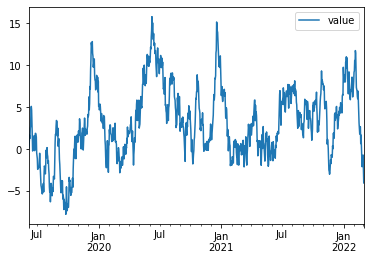

In [26]:
df.plot()

***
*TIP: Note that Series doesn't have a legend set automatically. This is bcs we only pass values form the series to `plot()` function You need to do that with parameter `legend` and `label`.*

`ts.plot(label = 'value', legend = True)`

***

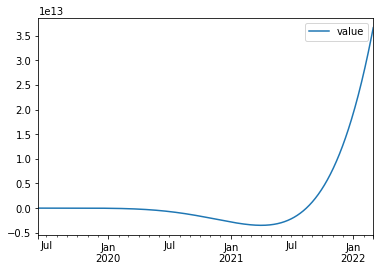

In [49]:
#In series we don't have column do we don't have to call ts['value']
ts = ts.cumsum()
ts.plot(label = 'value', legend = True)

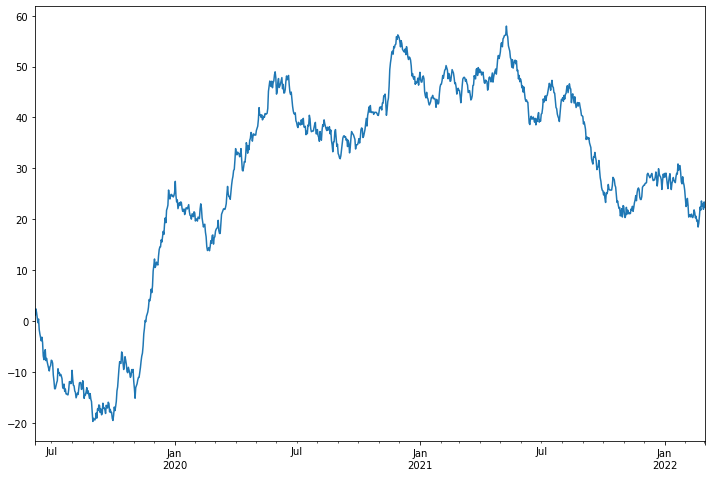

In [37]:
# Make it bigger with figzie parameter
ts.plot(figsize = (12,8))

### Importing dataset from seaborn

In [39]:
iris = sns.load_dataset('iris')

In [42]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


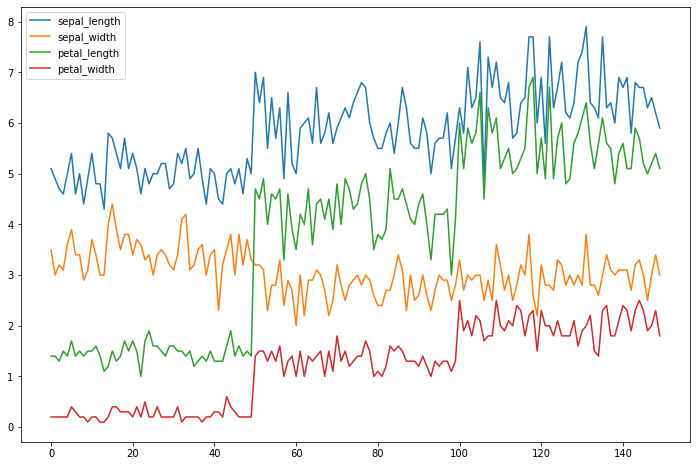

In [44]:
iris.plot(figsize=(12,8))

***

<a id='LOG SCALE'></a>

### LOG SCALE

<a href='#TOP'>BACK TO TABLE OF CONTENTS</a>

### Log scales show relative values
<blockquote> Log scales show relative values instead of absolute ones. Log scales don’t care about the fact that 101 minus 100 equals the same as 2 minus 1. Instead, they are concerned with percentages: between 100 and 101 is a 1% increase, while between 1 and 2 is a 100% increase. So on a log scale, the distance between 100 and 101 is roughly 1% of the distance between 1 and 2 <\blockquote>

### The same distance on a log scale shows the same rate
<blockquote>So what do same distances on a log scale show? They show the same percentage growth or decline. Imagine you eat candy for money and your business grows yearly by 100%. That means every year you eat twice as many candies than you ate the previous year.

In year zero, you start by eating 1 candy.

In the 1st year, you eat 2 candies. The year after that, you eat 4 candies. In the 3rd year, you eat 8 candies. By year 5, you eat 32 candies, and on your 25th anniversary, you would be eating 33.5 million candies.

On a linear scale, a line chart plotting these numbers would go insanely high very quickly. On a log scale, each of these amounts takes up the same space, because, in each year, the number of candies grows at a fixed rate (100%).<\blockquote>

> source:https://blog.datawrapper.de/weeklychart-logscale/

***

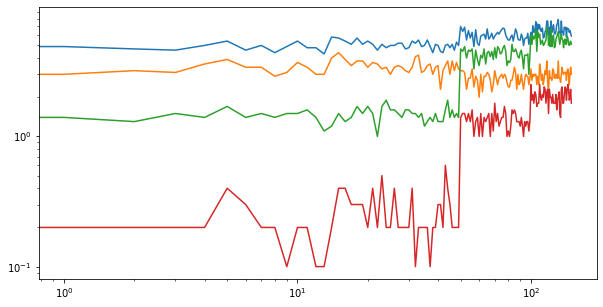

In [51]:
#you can change y or x axis to log sacles by using logy and logx
iris.plot(legend = False, figsize=(10,5), logy=True, logx=True)

### More on Line plot: Using and Creating Secondary Axis

In [56]:
#Creating Datasets
x = iris.drop(labels=['sepal_width','petal_width'], axis=1)
x.head()

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


In [54]:
y = iris[['sepal_width','petal_width']]
y.head()

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


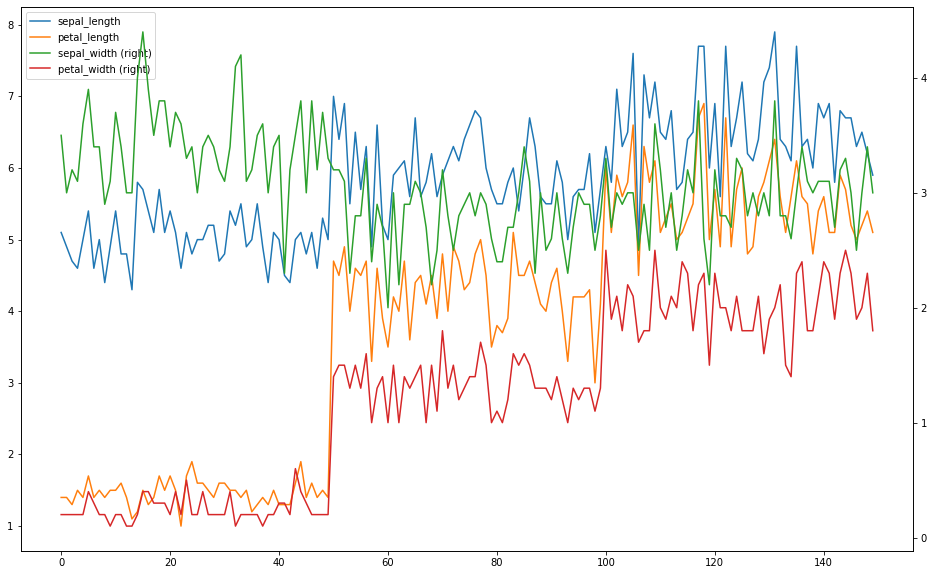

In [58]:
ax = x.plot()
y.plot(figsize=(16,10), secondary_y=True, ax=ax)

<a id='BAR PLOT'></a>

## BAR PLOT
***

<a href='#TOP'>BACK TO TABLE OF CONTENTS</a>

In [59]:
df_bar = iris.drop(['species'], axis=1)

In [65]:
df_bar.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


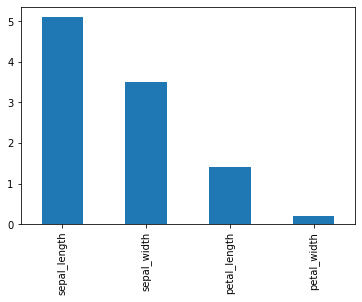

In [62]:
df_bar.iloc[0].plot(kind='bar')

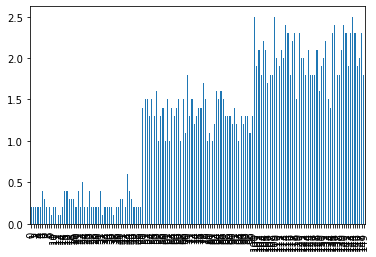

In [66]:
#It's easy to get it to the point where it's too messy. Use bar only for categorical data.
df_bar['petal_width'].plot.bar()

***
*TIP: It's easy to get it to the point where it's too messy. Use bar only for categorical data. Note that you can only plot numerical data into bars/histograms. So in case data is stored as string as in case with `iris['species']` you need to change it into numbers using `.value_counts()`*
***

In [6]:
iris['species'].nunique()

3

In [7]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

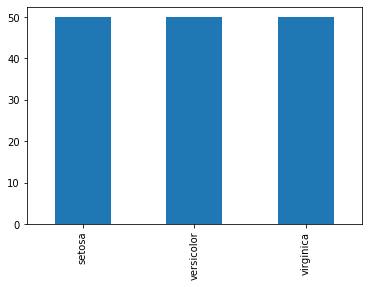

In [74]:
iris['species'].value_counts().plot(kind='bar')

<a id='STACKED PLOT'></a>

## STACKED PLOT
*Answers the question: For each row. What is a percentage of particular value in that row*

<a href='#TOP'>BACK TO TABLE OF CONTENTS</a>
***

In [13]:
df = pd.DataFrame(randn(10,4), columns=['a','b','c','d'])
df.head()

,a,b,c,d
0,0.342556,1.435074,-0.458269,-0.102916
1,0.223746,-2.155929,0.913909,1.135806
2,-1.751594,-1.410700,1.111228,0.858414
3,-0.688064,0.172185,-1.133700,0.551523
4,-0.934084,0.247979,-1.146749,-0.013188


***
*TIP: Values start from 0 then all negatives and positives are stacked on each other going respective directions (down negatives, up positives) Now the height of the bar will be `sum(abs([values]))` and height of bar on positive side will be `sum(df.iloc[n][df.iloc[n] > 0]`*
***

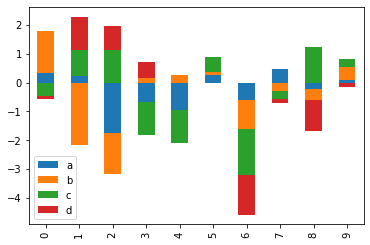

In [15]:
df.plot.bar(stacked=True)

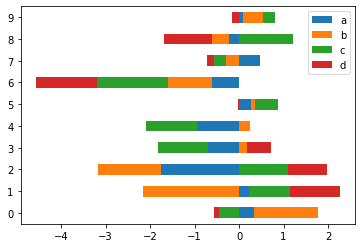

In [29]:
#Stacked Horizontaly
df.plot.barh(stacked=True)

<a id='HISTOGRAM'></a>

## HISTOGRAM
*Answers the question: For each row. What is a percentage of particular value in that row*

<a href='#TOP'>BACK TO TABLE OF CONTENTS</a>
***

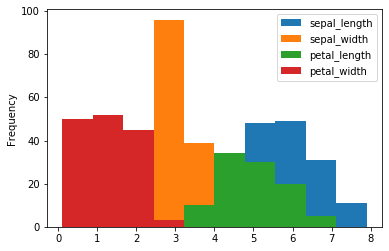

In [31]:
iris.plot.hist()

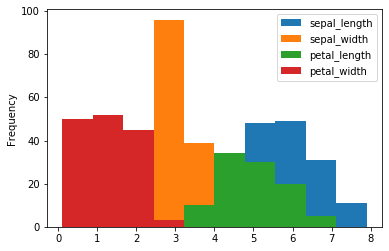

In [32]:
iris.plot(kind='hist')

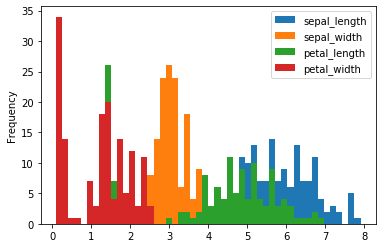

In [33]:
#Control Number of bins
iris.plot(kind='hist', bins=50)

***
*TIP: Note that the hist is not that good to check distirbution since some categoires are stacked on each other. To see distirbution clearer use stacked = True*
***

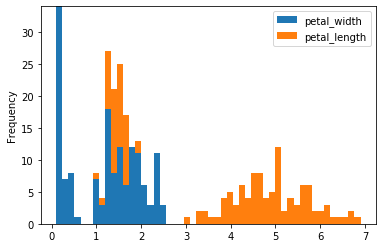

In [37]:
iris[['petal_width','petal_length']].plot(kind='hist', bins=50, stacked = True)

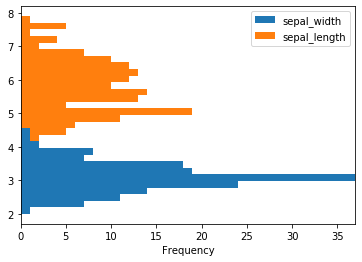

In [38]:
iris[['sepal_width','sepal_length']].plot(kind='hist', bins=30, stacked=True, orientation='horizontal')

In [52]:
iris_numeric = iris.drop('species', axis=1)

<blockquote>DataFrame.diff(periods=1, axis=0)

    First discrete difference of element. Calculates the difference of a Dataframe element compared with another element in the Dataframe (default is element in previous row). 

</blockquote>

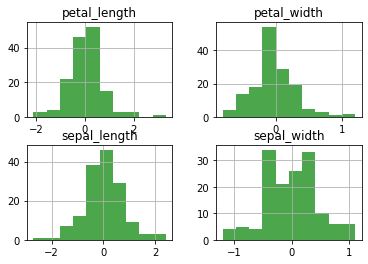

In [53]:
iris_numeric.diff().hist(color='g', alpha=0.7)
plt.show()

<a id='BOX PLOT'></a>

## BOX PLOT
*Answers the question: Going from the bottom of figure: minimum value of data, first quartile (marekd by bottom of box), second quatrile (green line crossing box- aka MEDIAN), thrid quartile (form median to top of a box), maximum value data at the top. The round small dots above and below max/min are automatically deteceted outliers*

<a href='#TOP'>BACK TO TABLE OF CONTENTS</a>
***

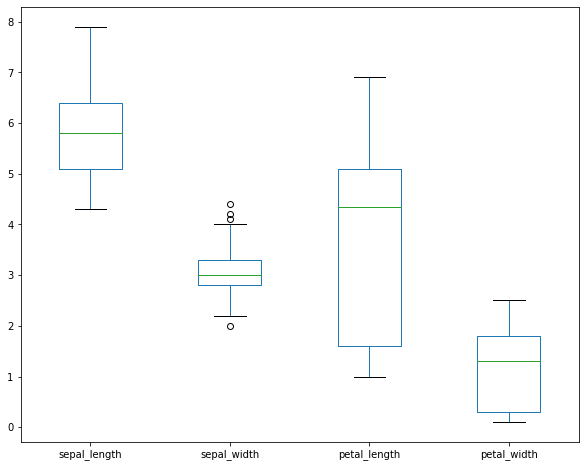

In [54]:
iris_numeric = iris.drop('species', axis=1)
iris_numeric.plot(kind='box', figsize=(10,8))

In [56]:
#check with describe()
iris_numeric.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


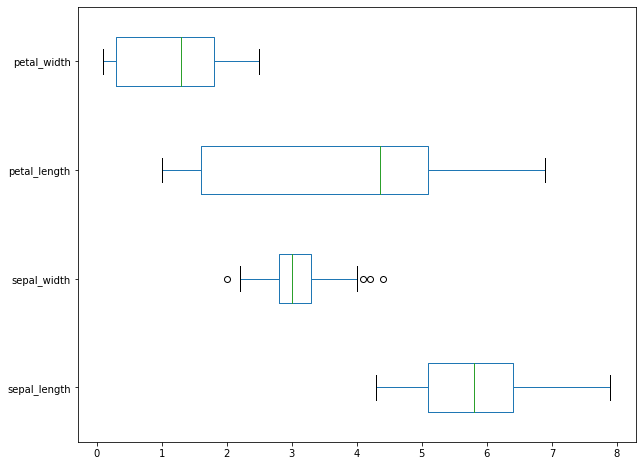

In [58]:
#Make it horizontal
iris_numeric.plot(kind='box', figsize=(10,8), vert=False)

<a id='AREA AND SCATTER PLOT'></a>

## AREA AND SCATTER PLOT

<a href='#TOP'>BACK TO TABLE OF CONTENTS</a>
***

In [59]:
iris_numeric = iris.drop('species', axis=1)

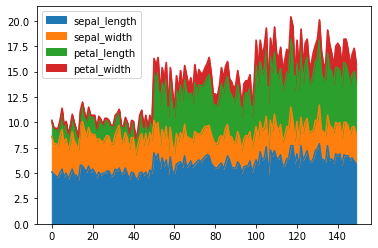

In [63]:
iris_numeric.plot(kind='area')

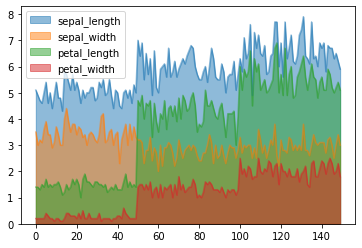

In [66]:
iris_numeric.plot(kind='area', stacked=False, alpha=0.5)

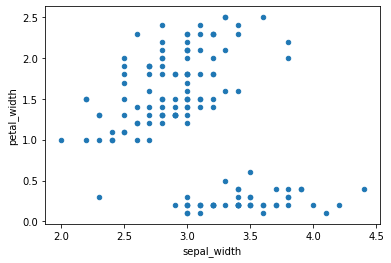

In [69]:
iris_numeric.plot(kind='scatter', x='sepal_width', y='petal_width')

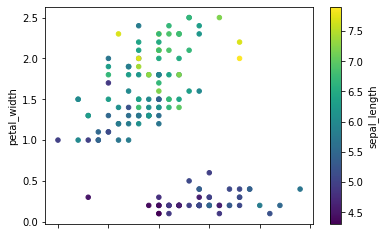

In [81]:
#Introduce third paramter in form of colour density with c= parameter
iris_numeric.plot(kind='scatter', x='sepal_width', y='petal_width', c='sepal_length', colormap='viridis')

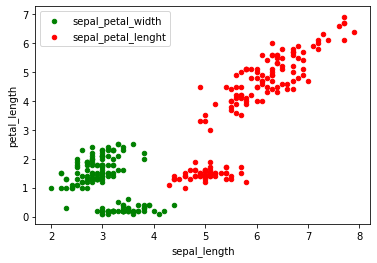

In [85]:
ax = iris_numeric.plot(kind='scatter', x='sepal_width', y='petal_width', label='sepal_petal_width', color='g')
iris_numeric.plot(kind='scatter', x='sepal_length', y='petal_length', ax=ax, label='sepal_petal_lenght', color='r')

<a id='HEX PLOT'></a>

# HEX PLOT

<a href='#TOP'>BACK TO TABLE OF CONTENTS</a>
***

In [86]:
#Generate Data
iris_numeric = iris.drop('species', axis=1)

<blockquote>
If `C` is specified, specifies values at given coordinates
``(x[i], y[i])``. These values are accumulated for each hexagonal
bin and then reduced according to `reduce_C_function`,
having as default the NumPy's mean function (:meth:`numpy.mean`).
(If `C` is specified, it must also be a 1-D sequence
of the same length as `x` and `y`, or a column label.)
</blockquote>

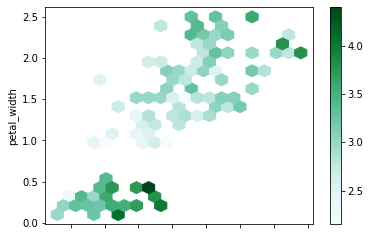

In [97]:
iris_numeric.plot.hexbin( x='sepal_length', y='petal_width', gridsize=20, C='sepal_width')

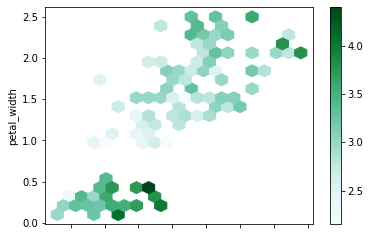

In [96]:
iris_numeric.plot(kind='hexbin', x='sepal_length', y='petal_width', gridsize=20, C='sepal_width')

<a id='PIE PLOT'></a>

# PIE PLOT

<a href='#TOP'>BACK TO TABLE OF CONTENTS</a>
***

In [132]:
#Generate Data
iris_numeric = iris.drop('species', axis=1)

***
*TIP: Pie plot works column wise so in order to plot multiple of them you need to first transform the dataframe*
`iris_numeric.iloc[0:5].T`
***

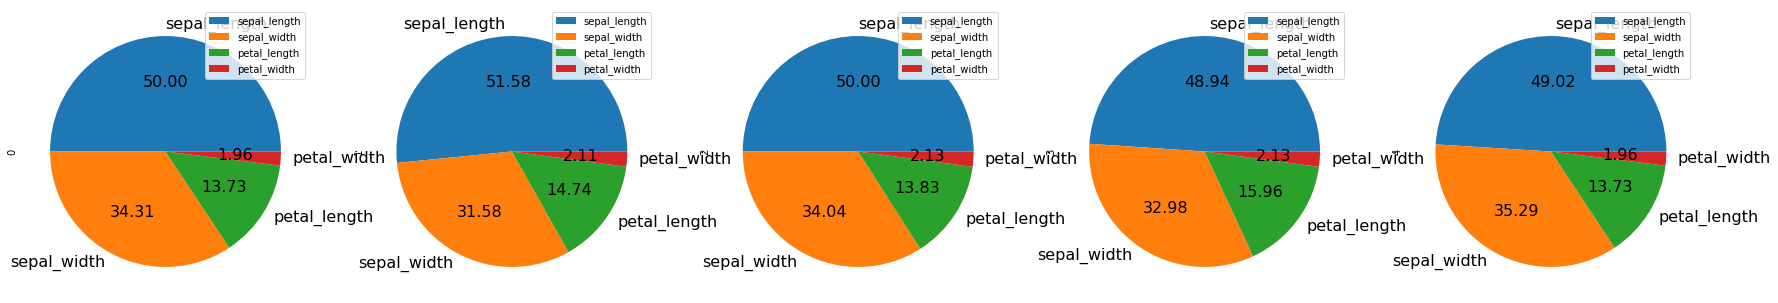

In [120]:
iris_numeric.iloc[0:5].T.plot.pie(subplots=True, figsize = (30,40), fontsize = 16, autopct='%.2f')
plt.show()

***
*TIP: `iris_numeric.iloc[0:5].T.plot.pie(subplots=True, figsize = (30,40), fontsize = 16, autopct='%.2f')`. autopct makes pct share of given value in pie visible. You need to specify the format for them to appear. fontsize regulates the size of captions*
***

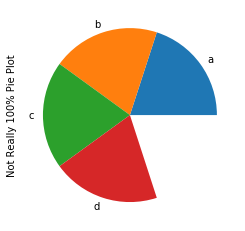

In [123]:
# Graph when sum of data is not equal 100%
series = pd.Series([0.2]*4, index=['a','b','c','d'], name='Not Really 100% Pie Plot')
series.plot.pie()
plt.show()


<a id='SCATTER MATRIX'></a>

# SCATTER MATRIX
*Convinent way to map all factors with each other on scatter plots. We can also specify kind of plot for matrix diagonal. KDE: kernel density estimated plots. They show where most of the values are concentrated. Eg for below sepal_width is mostly concentrated around 3*

<blockquote>
    diagonal : {'hist', 'kde'}
    Pick between 'kde' and 'hist' for either Kernel Density Estimation or
    Histogram plot in the diagonal.
</blockquote>


<a href='#TOP'>BACK TO TABLE OF CONTENTS</a>
***

In [133]:
#Generate Data
iris_numeric = iris.drop('species', axis=1)

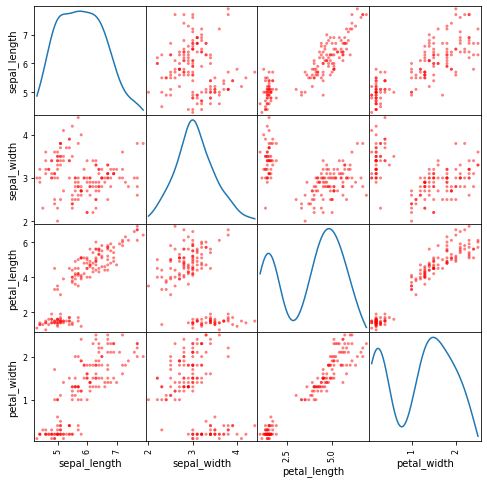

In [131]:
scatter_matrix(iris_numeric,figsize=(8,8), diagonal='kde',color='r')
plt.show()

<a id='SUBPLOTS'></a>

# SUBPLOTS

<a href='#TOP'>BACK TO TABLE OF CONTENTS</a>
***

In [134]:
#Generate Data
iris_numeric = iris.drop('species', axis=1)

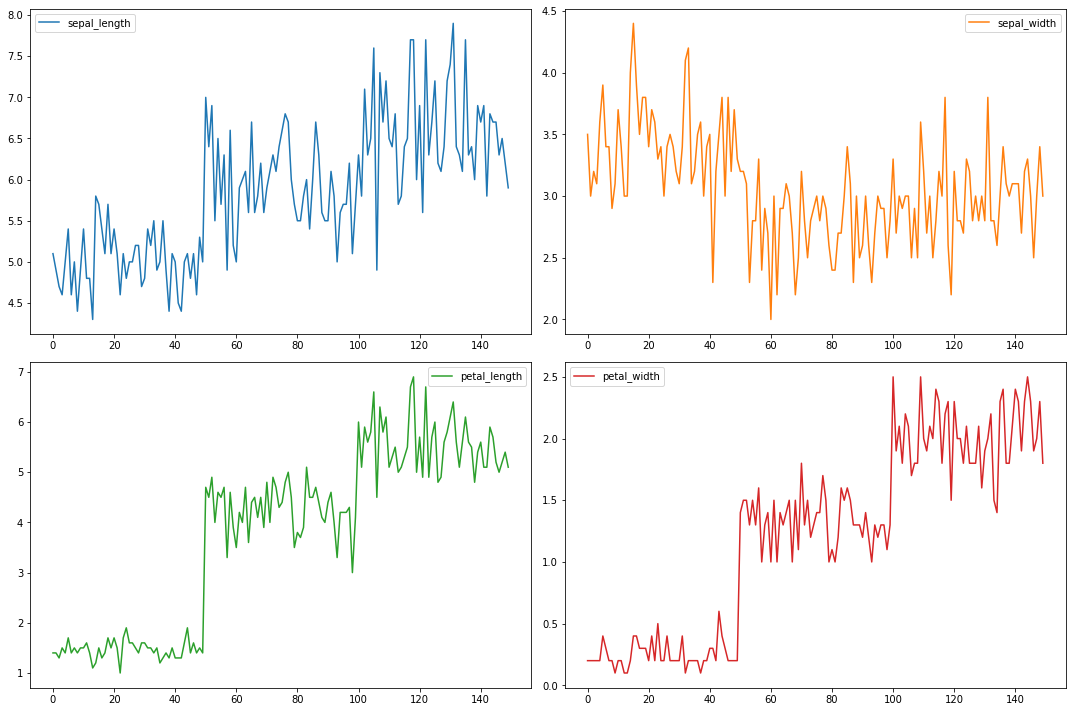

In [143]:
#sharex=False to make it not share the x-axis
#specify layout for subplots
iris_numeric.plot(subplots=True, figsize=(15,10), sharex=False, layout=(2,2))
#acoid overlapping
plt.tight_layout()
plt.show()


***